<a href="https://colab.research.google.com/github/owengenge/cap-comp215/blob/main/Project_1_Plotting_NEO's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Project 1:** Plotting Potentially Hazardous Near Earth Objects

Name: Owen Genge

Date: Feb 19, 2023



In [2]:
import datetime, json, requests
from pprint import pprint   
from dataclasses import dataclass
import matplotlib.pyplot as plt


In [3]:
API_KEY = 'BQuTOmvJ8rJthGRwxNG8a02iQmcoaXEMxQ0rviXq'  

today = str(datetime.date.today())

url = f'https://api.nasa.gov/neo/rest/v1/feed?start_date=2023-02-19&end_date={today}&api_key={API_KEY}'

response = requests.request("GET", url, headers={}, data={})

data = json.loads(response.text) 

n_results = data['element_count']
neos = data['near_earth_objects'][today]

#hazardous_neos = [item for item in neos if item['is_potentially_hazardous_asteroid'] is True]

#pprint(neos)

# api = f'https://api.nasa.gov/neo/rest/v1/neo/browse?start_date=2023-02-21&end_date=2023-02-22&api_key={API_KEY}'
# responseA = requests.request("GET", api, headers={}, data={})

# dataA = json.loads(responseA.text) 
# pprint(dataA)




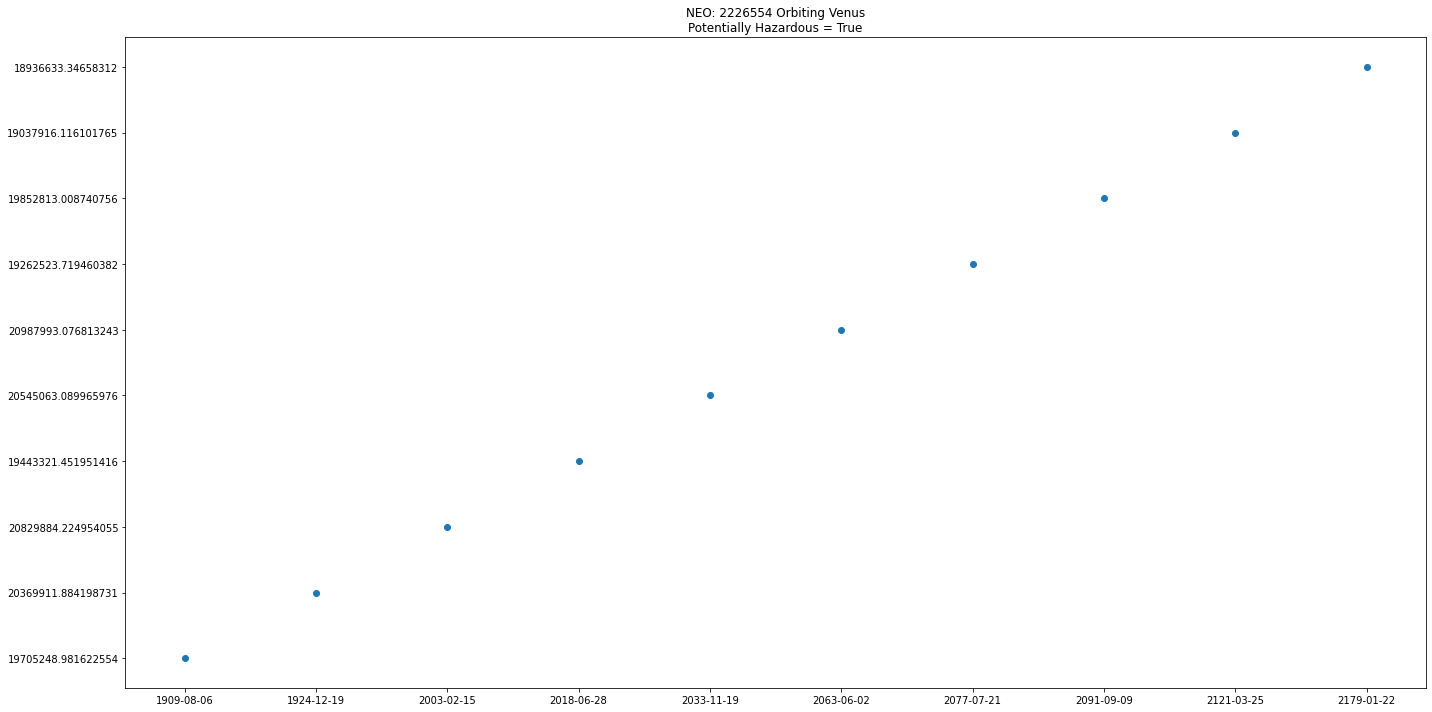

In [29]:
def ast_miss_data(orbiting_body, start_date, end_date, potentially_hazardous, id):
  ''' Displays a scatter plot of a NEO's distance from earth in a given time series. '''

  API_KEY = 'BQuTOmvJ8rJthGRwxNG8a02iQmcoaXEMxQ0rviXq'  
  url = f'https://api.nasa.gov/neo/rest/v1/neo/{id}/?start_date={str(start_date)}&end_date={str(end_date)}&api_key={API_KEY}'
  response = requests.request("GET", url, headers={}, data={})
  data = json.loads(response.text)
  
  approach_data = data['close_approach_data']
  
  if data['is_potentially_hazardous_asteroid'] is potentially_hazardous:
    miss_distnaces = [item['miss_distance']['kilometers'] 
                    for item in approach_data if item['orbiting_body'] == str(orbiting_body)]
    approach_dates = [item['close_approach_date'] 
                    for item in approach_data if item['orbiting_body'] == str(orbiting_body)]
    
    plt.rcParams["figure.autolayout"] = True
    plt.title(f'NEO: {id} Orbiting {orbiting_body}\nPotentially Hazardous = {potentially_hazardous}')
    plt.scatter(approach_dates, miss_distnaces)
    
    plt.show

  else:
    print(f'Cannot find data on NEO: {id} potentially hazardous = {not(potentially_hazardous)}')
 

ast_miss_data(orbiting_body='Venus', start_date=None, end_date=None, potentially_hazardous=True, id='2226554')




